# Syriatel Customer Churn Project

## Introduction




This project analyzes the  [SyriaTel Churn dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) to predict whether a customer is likely to stop doing business with SyriaTel, a telecommunications company. The goal of this analysis is to help the business identify customers at high risk of churning and support data-driven decisions aimed at improving customer retention.


## Objectives 


The main objectives of this project are to:

1. Clean and prepare the customer data for classification modeling  
2. Build and evaluate classification models to predict customer churn  
3. Identify key factors associated with customer churn  
4. Provide actionable recommendations to reduce customer churn


## Business Understanding



Customer churn represents a significant financial challenge for telecommunications companies as losing customers directly impacts recurring revenue. SyriaTel’s management require data-driven insights to better understand which customers are most likely to leave the service.

This analysis focuses on identifying patterns in customer behavior, such as service usage, subscription plans, and customer service interactions, that are associated with higher churn risk. By predicting churn in advance, the business can target at-risk customers with retention strategies, such as improved support or personalized offers, to reduce overall customer loss.


## Data Understanding

In [31]:
# importing the necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay


df = pd.read_csv("./Data/Customer_Churn.csv")
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
# overview of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### NOTE:
We have 4 non-numerical columns(`state`,`phone number`,`international plan`,`voice mail plan`) thus before modeling there is need to understand the contents of those columns and encode them appropriately

In [3]:
#Descriptive analysis
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
#Checking for null values
df.isna().sum() # No null values from the output


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
#Check for duplicates
df.duplicated().sum() #No duplicatesfrom the output

0

In [6]:
#Convert the columnsto snake case for readability
df.columns = df.columns.str.replace(' ', '_')
df.columns


Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

### Exploring some  possible feature columns

In [7]:
df['international_plan'].value_counts()

no     3010
yes     323
Name: international_plan, dtype: int64

In [8]:
df['customer_service_calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer_service_calls, dtype: int64

In [9]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     68
WA     66
NV     66
CO     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ND     62
ME     62
OK     61
NE     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

### Exploring the Target Variable(Churn) Column

In [10]:
#Checking the churn column to see its content
df['churn'].value_counts(normalize=True) *100

False    85.508551
True     14.491449
Name: churn, dtype: float64

### NOTE:


The `churn` column has 85:15 split meaning it is imbalanced thus need to apply methods to handle this(SMOTE and class weights)

### Handling the target column which is a categorical column to numerical column

In [11]:
## Handling the target column
df['churn'] = df['churn'].apply(lambda x: 1 if x== True else 0)


In [12]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

### Handling the feature columns that are categorical to numerical columns

In [13]:
#Checking the state column to undestand the number of states in that column since if i encode it having very many unique values can lead to risk of high dimensionality
len(df['state'].value_counts())

51

#### Dealing with the state column
The state column has 51 different states thus if i encode it this could lead to high dimensionality which would affect the model's performance.
I choose to drop that column to avoid risk of overfitting and use the `area code` column  to reference geographical location

In [14]:
#Columns to drop
# Phone numbers are respective to indivual and has little to no relation on churn rate
#Also dropping the state column as stated above 
cols_to_drop =['state','phone_number']
df = df.drop(cols_to_drop, axis=1)


In [15]:
#To confirm the columns were dropped
df.columns

Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

In [16]:
## Handling the rest of the categorical feature columns
categorical_cols = [ 'international_plan', 'voice_mail_plan']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [17]:
# Confirming the categorical columns were encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   number_vmail_messages   3333 non-null   int64  
 3   total_day_minutes       3333 non-null   float64
 4   total_day_calls         3333 non-null   int64  
 5   total_day_charge        3333 non-null   float64
 6   total_eve_minutes       3333 non-null   float64
 7   total_eve_calls         3333 non-null   int64  
 8   total_eve_charge        3333 non-null   float64
 9   total_night_minutes     3333 non-null   float64
 10  total_night_calls       3333 non-null   int64  
 11  total_night_charge      3333 non-null   float64
 12  total_intl_minutes      3333 non-null   float64
 13  total_intl_calls        3333 non-null   int64  
 14  total_intl_charge       3333 non-null   

In [18]:
df.columns

Index(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn', 'international_plan_yes',
       'voice_mail_plan_yes'],
      dtype='object')

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop('churn', axis=1)
y = df['churn']

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(selected_features)


Index(['number_vmail_messages', 'total_day_minutes', 'total_day_charge',
       'total_eve_minutes', 'total_eve_charge', 'total_intl_minutes',
       'total_intl_charge', 'customer_service_calls', 'international_plan_yes',
       'voice_mail_plan_yes'],
      dtype='object')


## Feature selection

I have decided to go with a heatmap to understand the relationships between the feature variables. This helps will help me infeature selection by:

- Identifying highly correlated features that may be redundant  
- Help ensure that multicollinearity does not adversely affect my classification models 

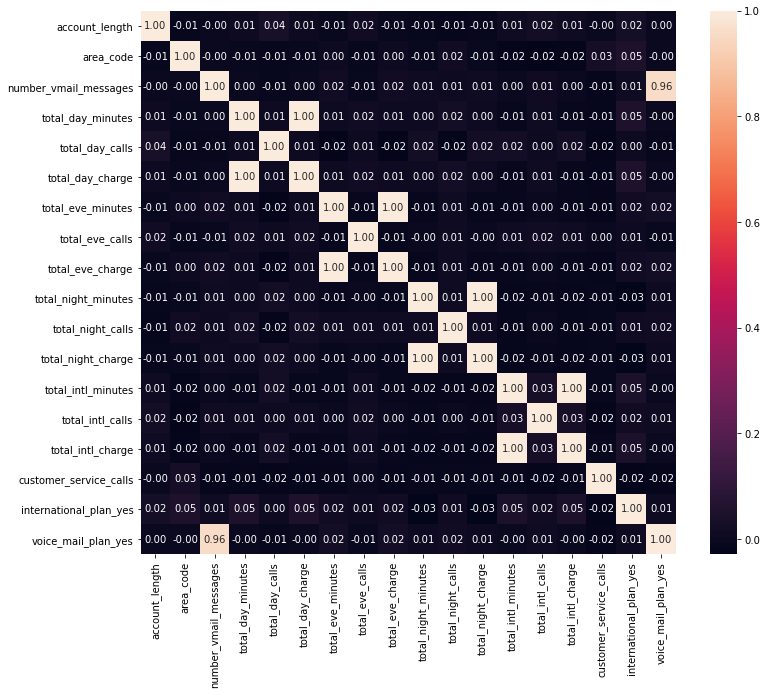

In [20]:
#Plotting a heatmap for the feature variables 
corr = df.drop('churn', axis=1).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

### Analysis of the above heatmap
For this model, I will choose to pick `total_day_minutes, total_eve_minutes, total_intl_minutes, customer_service_calls, international_plan_yes, and voice_mail_plan_yes` as the input features(X variables) based on what I observed in the correlation heatmap. 

The heatmap showed that usage minutes were highly correlated with their corresponding charge variables. I also noticed a very strong correlation between number_vmail_messages and voice_mail_plan_yes, so I kept only voice_mail_plan_yes as the plan indicator to avoid repeating the same signal. 

## Modeling the dataset 

In [21]:
features = ['total_day_minutes', 'total_eve_minutes', 'total_intl_minutes', 'customer_service_calls', 'international_plan_yes', 'voice_mail_plan_yes']

X = df[features]
y= df['churn']

In [22]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [23]:
#Investigating need for scaling
X.describe()

,total_day_minutes,total_eve_minutes,total_intl_minutes,customer_service_calls,international_plan_yes,voice_mail_plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,179.775098,200.980348,10.237294,1.562856,0.096910,0.276628
std,54.467389,50.713844,2.791840,1.315491,0.295879,0.447398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,143.700000,166.600000,8.500000,1.000000,0.000000,0.000000
50%,179.400000,201.400000,10.300000,1.000000,0.000000,0.000000
75%,216.400000,235.300000,12.100000,2.000000,0.000000,1.000000
max,350.800000,363.700000,20.000000,9.000000,1.000000,1.000000


### Note:
From the above descriptive statistics , columns such as total_day_minutes and total_eve_minutes have ranges from 0-350 while total_intl_minutes 0-20 customer_service_calls 1-9 thus need for scaling the features

In [24]:
#Splitting the data into training and test splits
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state =42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (2666, 6)
Test shape: (667, 6)


### Solving the target imbalance issue with SMOTE

In [25]:
y_train.value_counts(normalize=True) *100 # We have 85:15 churn rate thus imbalance 


0    85.671418
1    14.328582
Name: churn, dtype: float64

In [26]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Only apply to training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class balance
print(y_train_resampled.value_counts())


1    2284
0    2284
Name: churn, dtype: int64


### Scaling the features before fitting our model

In [27]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and test
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)



### Fitting the baseline model

In [ ]:

# Initialize logistic regression
LogR = LogisticRegression(max_iter=1000, random_state=42)

# Fitting the model
LogR.fit(X_train_scaled, y_train_resampled)

# Predicting
y_pred = LogR.predict(X_test_scaled)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[400 166]
 [ 21  80]]


array([False,  True])

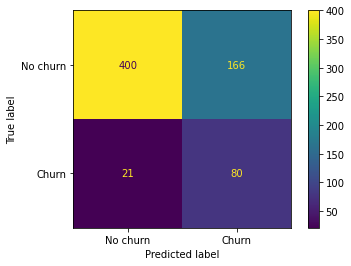

In [34]:
#checking how y_preds far from y_test
cm = confusion_matrix(y_test,y_pred)

display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['No churn','Churn'])
display.plot()
# plt.show()
